In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2019-01-04 19:20:11--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2019-01-04 19:20:14 (338 MB/s) - ‘drug200.csv’ saved [6027/6027]



In [3]:
df = pd.read_csv('drug200.csv')

In [4]:
df.head(11)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [5]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [6]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

In [7]:
Y = df['Drug']

In [8]:
from sklearn import preprocessing

In [9]:
le_sex = preprocessing.LabelEncoder()

In [10]:
le_sex.fit(['M','F'])

LabelEncoder()

In [11]:
X[:,1] = le_sex.transform(X[:,1])

In [12]:
le_BP = preprocessing.LabelEncoder()

In [13]:
le_BP.fit(['HIGH','NORMAL','LOW'])

LabelEncoder()

In [14]:
X[:,2] = le_BP.transform(X[:,2])

In [15]:
le_cholestrol = preprocessing.LabelEncoder()

In [16]:
le_cholestrol.fit(['NORMAL','HIGH'])

LabelEncoder()

In [17]:
X[:,3] = le_cholestrol.transform(X[:,3])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.2)

In [20]:
drugtree = DecisionTreeClassifier(criterion = 'entropy')

In [21]:
drugtree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
drugtree.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
pred = drugtree.predict(test_x)

In [24]:
from sklearn import metrics

In [25]:
metrics.accuracy_score(test_y,pred)

0.975

In [26]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [27]:
dot_data = StringIO()

In [28]:
file = 'drugtree.png'

In [29]:
features = df.columns[0:5]

In [30]:
target = df['Drug'].unique().tolist()

In [31]:
out = tree.export_graphviz(drugtree,feature_names = features,out_file = dot_data,class_names = np.unique(train_y), filled=True,  special_characters=True,rotate=False)

In [32]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [33]:
graph.write_png(file)

True

In [34]:
image = mpimg.imread(file)

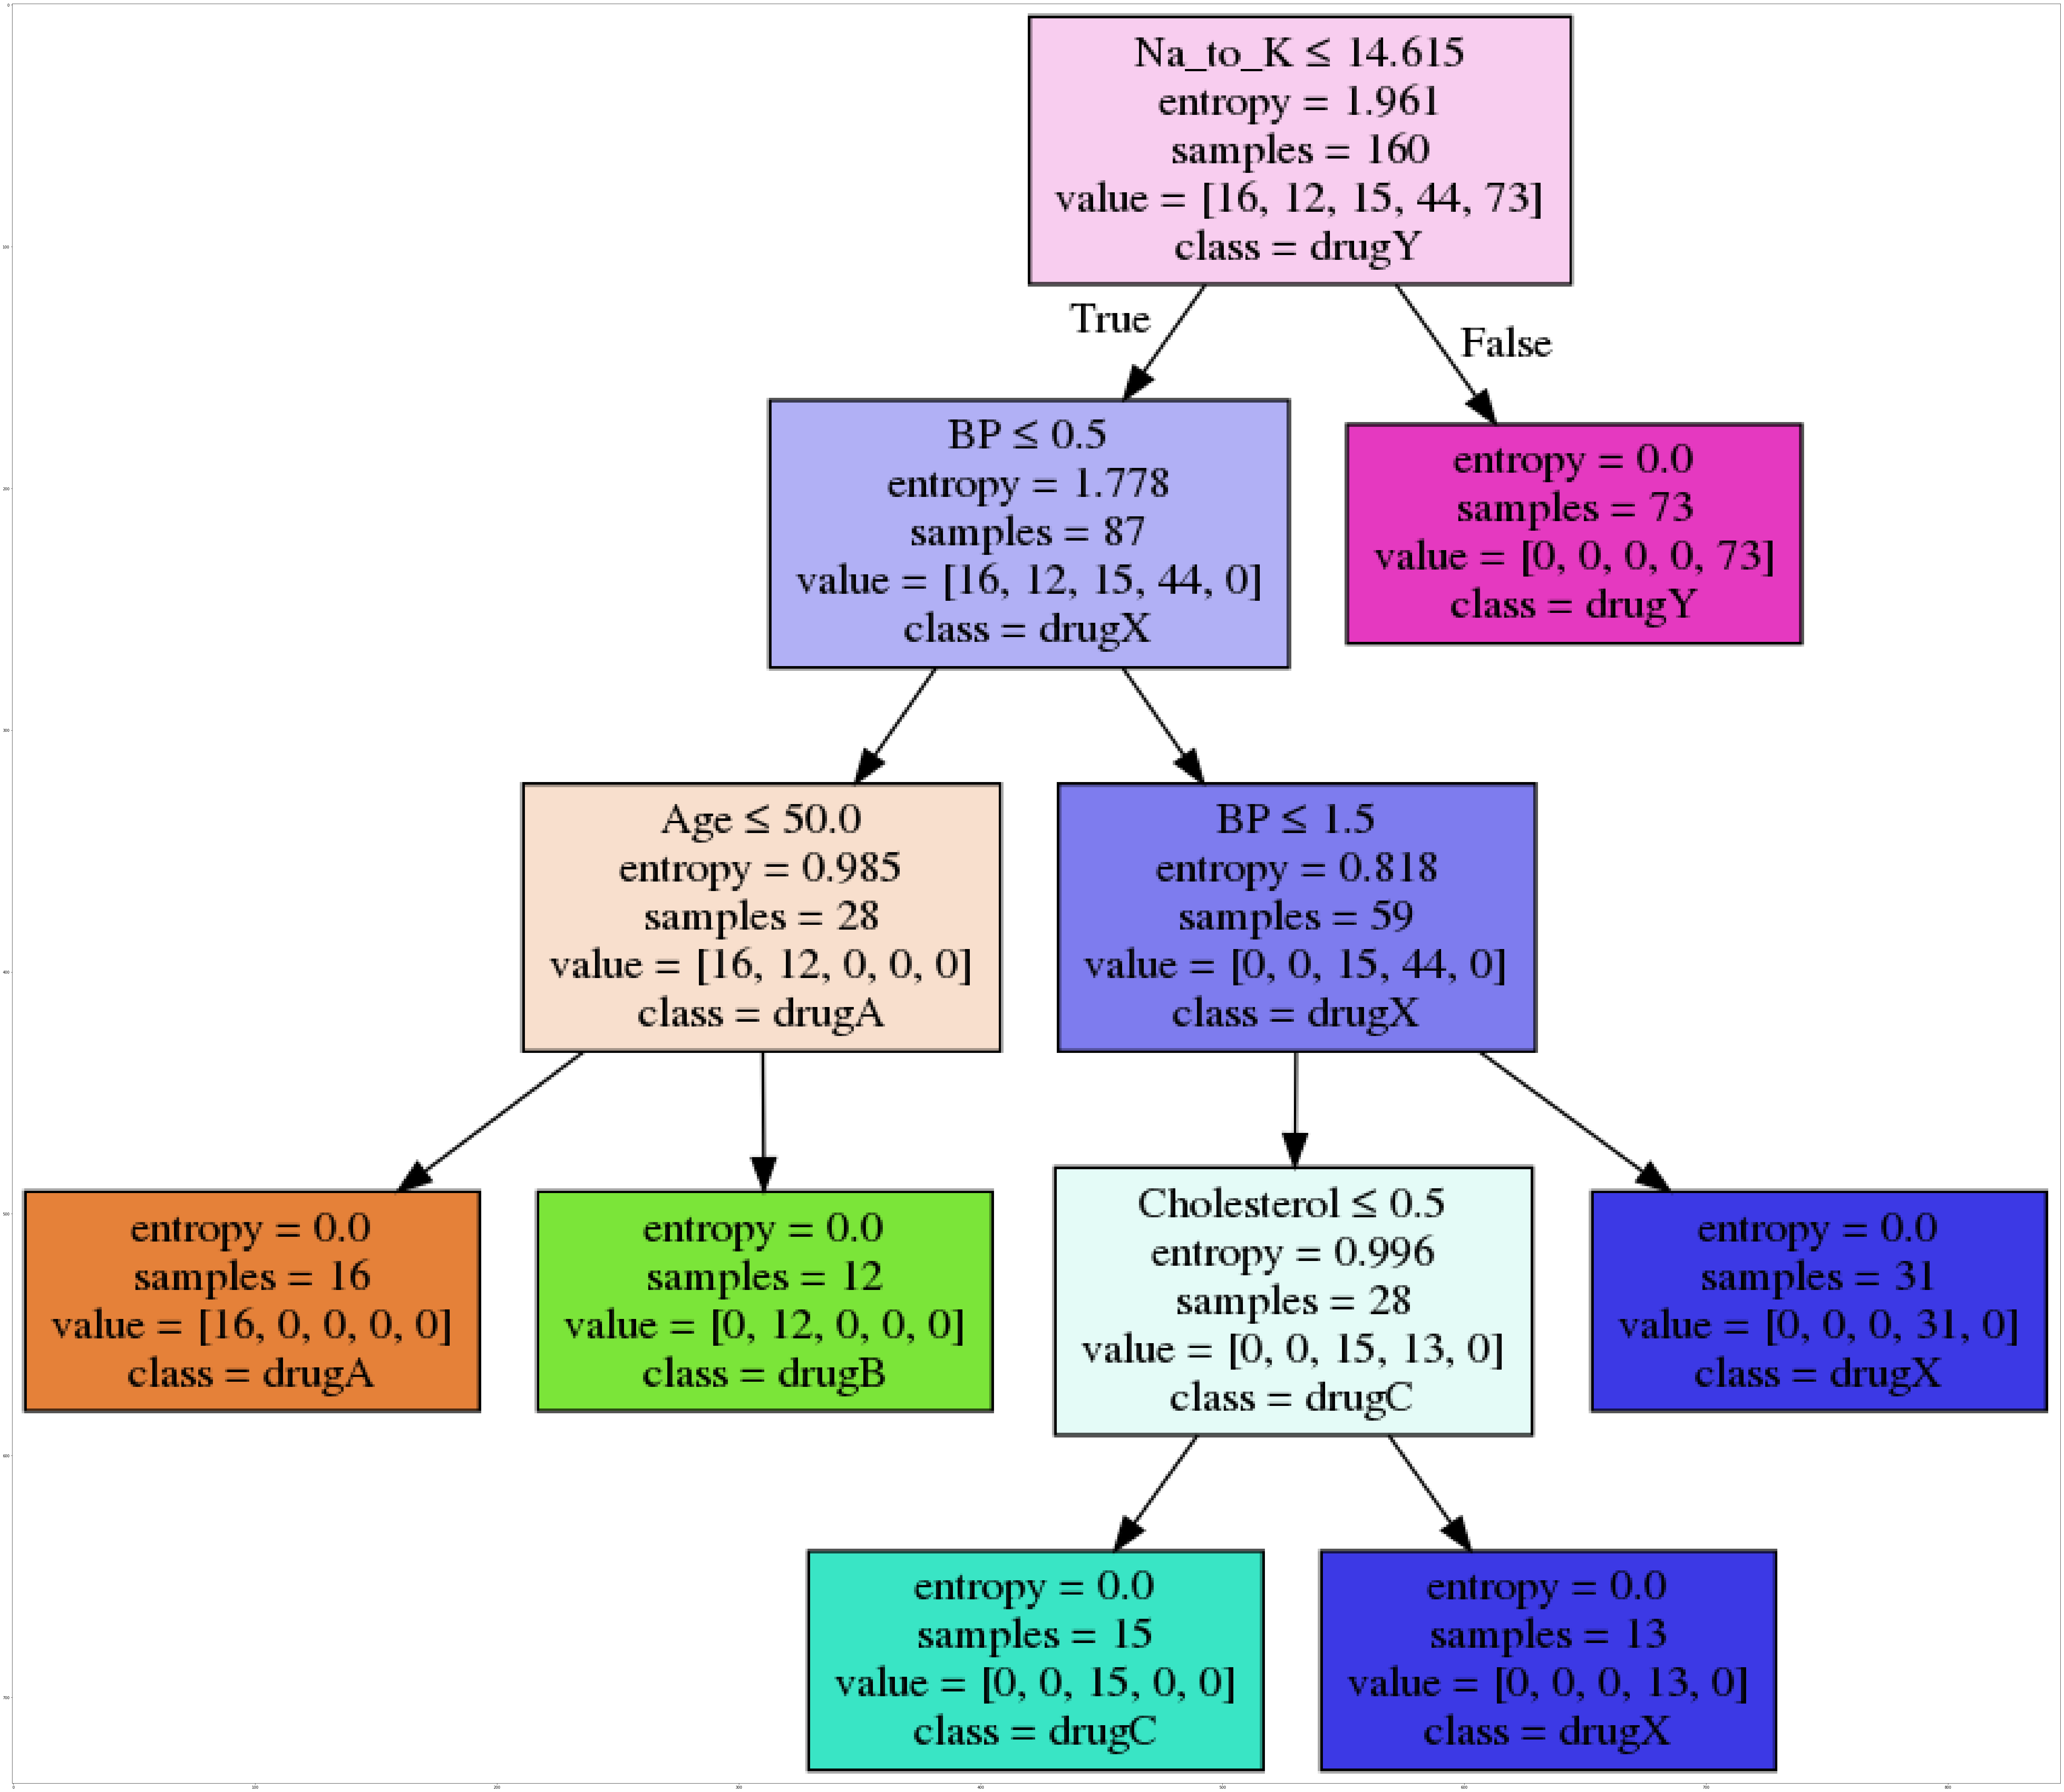

In [35]:
plt.figure(figsize = (100,200))
plt.imshow(image)